# Homework 3 

# Задача №1 - Лес или пустыня?

Часто при анализе изображений местности необходимо понять ее характер. В частности, если определить, что на изображении преобладет вода, то имеет смысл искать корабли на таком изображении. Если на картинке густой лес, то, возможно, это не лучшая зона для посадки дрона или беспилотника.

Ваша задача - написать программу, которая будет отличать лес от пустыни. В приложении можно найти реальные спутниковые снимки лесов и пустынь.

Примеры изображений:
<table><tr>
    <td> <img src="https://i.ibb.co/nmHHctW/test_image_00.jpg" alt="Drawing" style="width: 200px;"/> </td>
    <td> <img src="https://i.ibb.co/dM77C4b/test_image_06.jpg" alt="Drawing" style="width: 200px;"/> </td>
</tr></table>

In [62]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import MobileNetV2

In [63]:
# Параметры
img_height, img_width = 150, 150
batch_size = 32
num_classes = 2
# Путь к данным
data_dir = r'desert_forest'

In [64]:
def load_data(data_dir):
    images = []
    labels = []
    
    for img_name in os.listdir(data_dir):
        img_path = os.path.join(data_dir, img_name)
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_height, img_width))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        images.append(img_array)
        
        # Извлечение номера изображения из имени файла
        img_number = int(img_name.split('_')[2].split('.')[0])  # Получаем номер изображения
        labels.append(0 if img_number <= 9 else 1)  # 0 - лес, 1 - пустыня

    return np.array(images), np.array(labels)

In [65]:
images, labels = load_data(data_dir)

In [66]:
# Нормализация данных
images = images / 255.0

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [67]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [68]:
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),  # Regularization
        Dense(num_classes, activation='softmax')  # Change to 'sigmoid' for binary classification
    ])
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [69]:
model = create_model()

c:\Users\Kravt\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
from sklearn.utils.class_weight import compute_class_weight
class_labels = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=class_labels, y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

print("Class weights:", class_weight_dict)

Class weights: {0: 0.9285714285714286, 1: 1.0833333333333333}


In [71]:
model.fit(datagen.flow(X_train, y_train, batch_size=batch_size), 
          epochs=20, 
          validation_data=(X_test, y_test), class_weight=class_weight_dict)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3846 - loss: 0.7039

c:\Users\Kravt\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3846 - loss: 0.7039 - val_accuracy: 0.2500 - val_loss: 0.8733
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.4615 - loss: 0.9822 - val_accuracy: 0.7500 - val_loss: 0.7141
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.5385 - loss: 1.3793 - val_accuracy: 1.0000 - val_loss: 0.5135
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.7692 - loss: 0.5780 - val_accuracy: 1.0000 - val_loss: 0.4356
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.9231 - loss: 0.4987 - val_accuracy: 1.0000 - val_loss: 0.3534
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.7692 - loss: 0.4575 - val_accuracy: 1.0000 - val_loss: 0.2684
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.8462 - loss: 0.3581 - val_accuracy: 1.0000 - val_loss: 0.1163
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.8462 - loss: 0.3783 - val_accuracy: 1.0000 - val_loss: 0.1023
Epoch 

In [72]:
y_test

array([0, 0, 0, 1])

In [73]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 0.1115
Accuracy: 100.00%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


<Figure size 800x600 with 0 Axes>

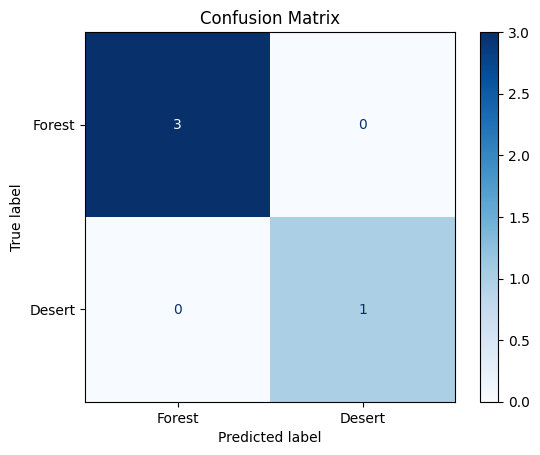

In [74]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Forest', 'Desert'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [75]:
model.save('forest_desert_classifier.h5')

# Задача №2 - Реализовать Image-blending на основе сшивки по градиентам

Задача - взять фото двух лиц : ваше и друга, с помощью метода Poisson image editing совместить глаза, нос и рот с первого изображения со вторым. Суть в том, что при использовании такого метода границы совмещенного изображения не видны.

Статья, где описан метод  

Patrick Pérez, Michel Gangnet, and Andrew Blake. 2003. Poisson image editing. ACM Trans. Graph. 22, 3 (July 2003), 313–318. https://doi.org/10.1145/882262.882269

Пример такого совмещения:

<img src="../homework/blending/blending.png" alt="Drawing" style="width: 700px;"/>


In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import spsolve

In [26]:
def poisson_blending(source, target, mask):
    """
    Функция для сшивки изображений по градиентам с помощью метода Poisson image editing.

    Args:
        source (numpy.ndarray): Исходное изображение.
        target (numpy.ndarray): Целевое изображение.
        mask (numpy.ndarray): Маска для определения области сшивки.

    Returns:
        numpy.ndarray: Результат сшивки изображений.
    """
    # Преобразование изображений в тип float32
    source = source.astype(np.float32)
    target = target.astype(np.float32)

    # Изменение размера изображения target до размеров изображения source
    target = cv2.resize(target, (source.shape[1], source.shape[0]))

    # Вычисление градиентов изображений
    grad_x = cv2.Sobel(source, cv2.CV_32F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(source, cv2.CV_32F, 0, 1, ksize=3)

    # Вычисление градиентов целевого изображения
    grad_target_x = cv2.Sobel(target, cv2.CV_32F, 1, 0, ksize=3)
    grad_target_y = cv2.Sobel(target, cv2.CV_32F, 0, 1, ksize=3)

    # Вычисление разности градиентов
    diff_x = grad_x - grad_target_x
    diff_y = grad_y - grad_target_y

    # Установка границ для разности градиентов
    diff_x[mask[:, :, 0] == 0] = 0
    diff_y[mask[:, :, 0] == 0] = 0

    # Создание матрицы для решения уравнения Пуассона
    n = source.shape[0] * source.shape[1]
    A = lil_matrix((n, n))
    b = np.zeros((n, 3))

    for i in range(source.shape[0]):
        for j in range(source.shape[1]):
            idx = i * source.shape[1] + j
            if mask[i, j, 0] == 0:
                A[idx, idx] = 1
                b[idx] = target[i, j]
            else:
                A[idx, idx] = 4
                if i > 0:
                    A[idx, idx - source.shape[1]] = -1
                if i < source.shape[0] - 1:
                    A[idx, idx + source.shape[1]] = -1
                if j > 0:
                    A[idx, idx - 1] = -1
                if j < source.shape[1] - 1:
                    A[idx, idx + 1] = -1
                b[idx] = diff_x[i, j] + diff_y[i, j]

    # Решение уравнения Пуассона
    x = spsolve(A.tocsr(), b)

    # Преобразование результата в тип uint8
    result = x.reshape((source.shape[0], source.shape[1], 3))
    result = np.clip(result, 0, 255).astype(np.uint8)

    return result


In [27]:
source = cv2.imread('blending/messi.png')
target = cv2.imread('blending/ronaldo.png')

In [28]:
mask = np.zeros(source.shape, dtype=np.uint8)
cv2.rectangle(mask, (100, 100), (300, 300), (255, 255, 255), -1)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [29]:
result = poisson_blending(source, target, mask)

Пока не получается  =( 

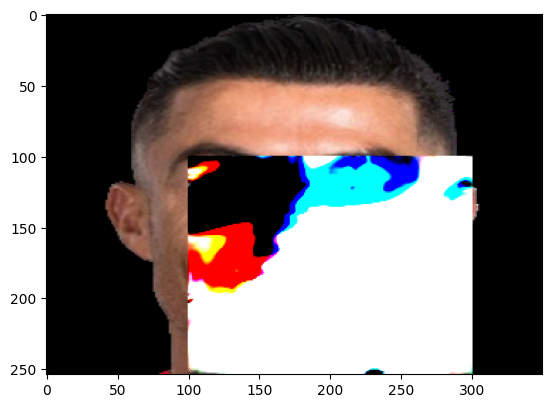

In [30]:
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

# Задача №3 - Найди клетки

Даны снимки раковых клеток. Существует задача - определить стадию рака клетки по такому изображению. Для того, чтобы подойти к решению классификации рака клетки, необходимо сначала подготовить данные.

Исходные изображения в реальных задачах могут быть очень большого размера (более 20000 px). Однако из визуального анализа можно заметить, что большая часть этих снимков пустая и не несет в себе полезную информацию.

Ваша задача выделить небольшие ячейки изображений из исходного так, чтобы на ячейках было только изображение клетки.

Пример исходного изображения и нарезанных ячеек клетки.
<img src="../img/cell_example.png" alt="Drawing" style="width: 500px;"/>

В качестве аргументов у функции будут значения:
1. исходное изображние;
2. размер ячейки;
3. количество ячеек.

__Доп вопрос__ - как можно выяснить какие нужны значения аргументов, чтобы они подходили для большинства исходных снимков?

In [69]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [70]:
def extract_and_display_cells(image_path, cell_size, num_cells):
    # Загружаем изображение
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Не удалось загрузить изображение.")
    
    # Преобразуем изображение в оттенки серого
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Применяем адаптивное пороговое преобразование для выделения клеток
    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV, 11, 2)
    
    # Находим контуры клеток
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Список для хранения клеток
    cells = []
    
    for contour in contours:
        # Получаем ограничивающий прямоугольник для каждого контура
        x, y, w, h = cv2.boundingRect(contour)
        
        # Проверяем, подходит ли размер клетки
        if w >= cell_size and h >= cell_size:
            # Вырезаем клетку
            cell = image[y:y+h, x:x+w]
            # Изменяем размер клетки до указанного размера
            cell_resized = cv2.resize(cell, (cell_size, cell_size))
            cells.append(cell_resized)
        
        # Прерываем, если достигнуто необходимое количество клеток
        if len(cells) >= num_cells:
            break
    
    # Определяем размер сетки для отображения клеток
    grid_size = int(np.ceil(np.sqrt(num_cells)))  # Определяем размер сетки
    fig, axs = plt.subplots(grid_size + 1, grid_size, figsize=(grid_size * 2, (grid_size + 1) * 2))
    
    # Отображаем оригинальное изображение в первой строке
    axs[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[0, 0].set_title('Оригинальное изображение')
    axs[0, 0].axis('off')  # Отключаем оси для оригинального изображения
    
    # Отображаем клетки в сетке
    for i in range(grid_size):
        for j in range(grid_size):
            index = i * grid_size + j
            if index < len(cells):
                axs[i + 1, j].imshow(cv2.cvtColor(cells[index], cv2.COLOR_BGR2RGB))
                axs[i + 1, j].set_title(f'Клетка {index + 1}')
            else:
                axs[i + 1, j].axis('off')  # Отключаем оси для пустых подграфиков
            axs[i + 1, j].axis('off')  # Отключаем оси
    
    plt.tight_layout()
    plt.show()

In [71]:
image_path = 'cells/train2_1.jpeg'
cell_size = 128  # размер ячейки
num_cells = 25  # количество ячеек


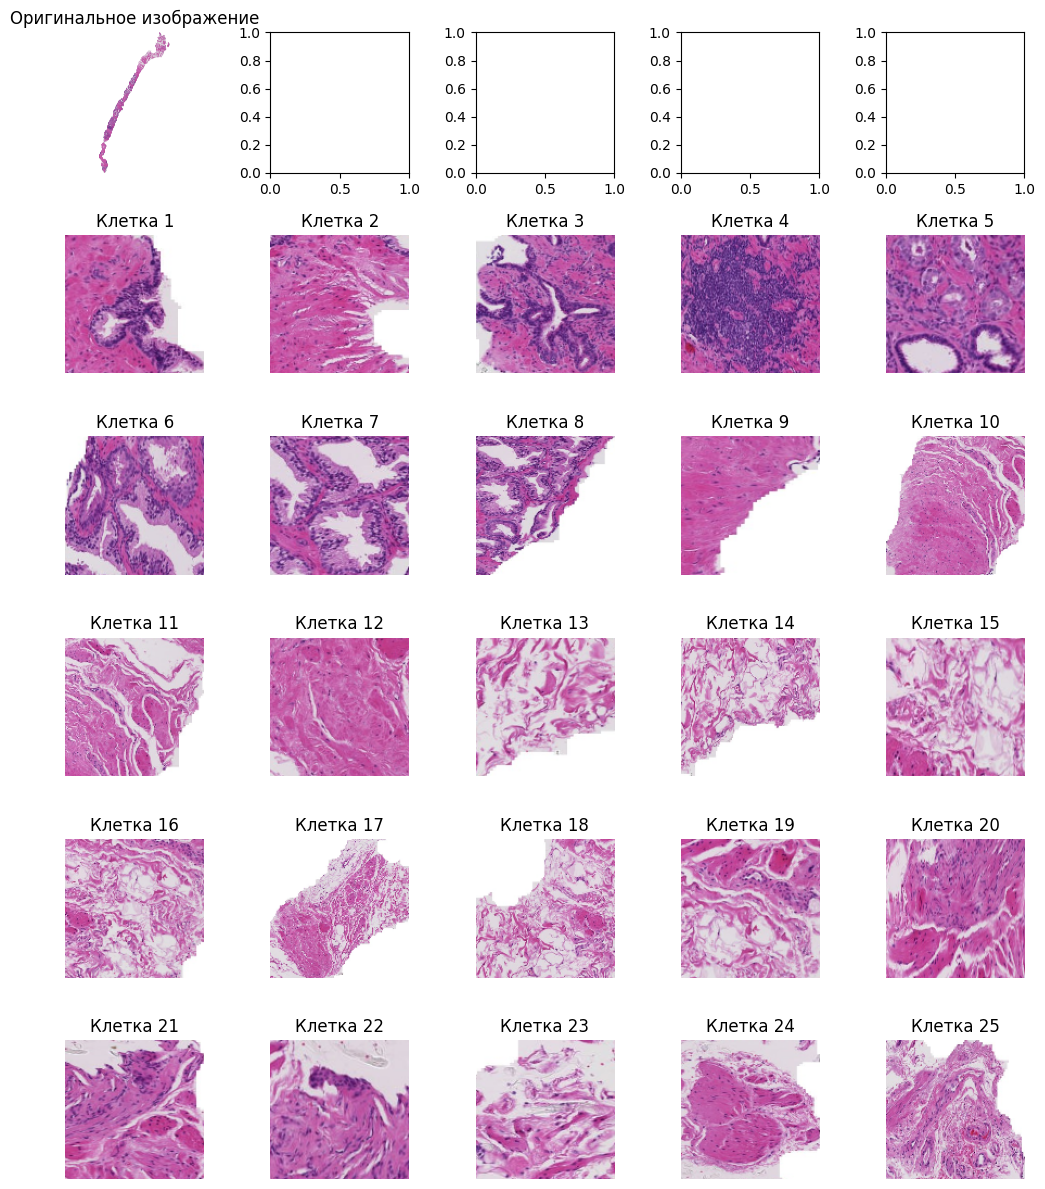

In [72]:
extract_and_display_cells(image_path, cell_size, num_cells)